# LLM v. Non-LLM DQN for LunarLander

## Imports:

In [1]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
from dotenv import load_dotenv

# Load in OpenAI API key
load_dotenv()
openai_key = os.getenv("OPENAI_API_KEY")

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)


# Now you should be able to import interactions folder
from interactions import dqn_interaction as dqn


# No LLM Agent:

## Training:

In [2]:
# Import Interaction Configs
from configs.i_dqn_LL_default import dqn_lunar_lander_default_configs_dict

nollm_training_trials = []
nollm_trained_agents = []

for x in range(3):
  dqn_interaction = dqn.DQNInteraction(dqn_lunar_lander_default_configs_dict)
  train_scores, trained_agent = dqn_interaction.train()
  nollm_training_trials.append(train_scores)
  nollm_trained_agents.append(trained_agent)


100%|██████████| 50/50 [00:04<00:00, 11.61it/s]


## Testing:

In [3]:
# Test the no-LLM agent
nollm_test_trials = []
for agent in nollm_trained_agents: 
  test_scores = dqn_interaction.test(trained_agent)
  nollm_test_trials.append(test_scores)

100%|██████████| 50/50 [00:08<00:00,  5.72it/s]


# LLM Agent:

## Training:

In [4]:
# Import Interaction Configs
from configs.i_DQN_with_LLM import dqn_lunar_lander_llm_configs_dict

training_trials = []
trained_agents = []

for x in range(3):
  # Swap out configs for the run
  dqn_interaction = dqn.DQNInteraction(dqn_lunar_lander_llm_configs_dict)
  train_scores, trained_agent = dqn_interaction.train()
  training_trials.append(train_scores)
  trained_agents.append(trained_agent)

100%|██████████| 50/50 [06:23<00:00,  7.66s/it]  


## Testing:

In [5]:
# Test the no-LLM agent
test_trials = []
for agent in trained_agents: 
  test_scores = dqn_interaction.test(trained_agent)
  test_trials.append(test_scores)

100%|██████████| 50/50 [00:01<00:00, 33.46it/s]


# Analysis:

## Preprocess Data

In [6]:
# Get average of training and testing scores

import numpy as np

# First non-llm network
nollm_training_scores_avg = np.mean(np.array(nollm_training_trials), axis = 0)
nollm_training_scores_std = np.std(np.array(nollm_training_trials), axis = 0)

nollm_testing_scores_avg = np.mean(np.array(nollm_test_trials), axis = 0)
nollm_testing_scores_std = np.std(np.array(nollm_test_trials), axis = 0)

# Next LLM network
training_scores_avg = np.mean(np.array(training_trials), axis = 0)
training_scores_std = np.std(np.array(training_trials), axis = 0)

testing_scores_avg = np.mean(np.array(test_trials), axis = 0)
testing_scores_std = np.std(np.array(test_trials), axis = 0)

## Make Plots

### Training Scores

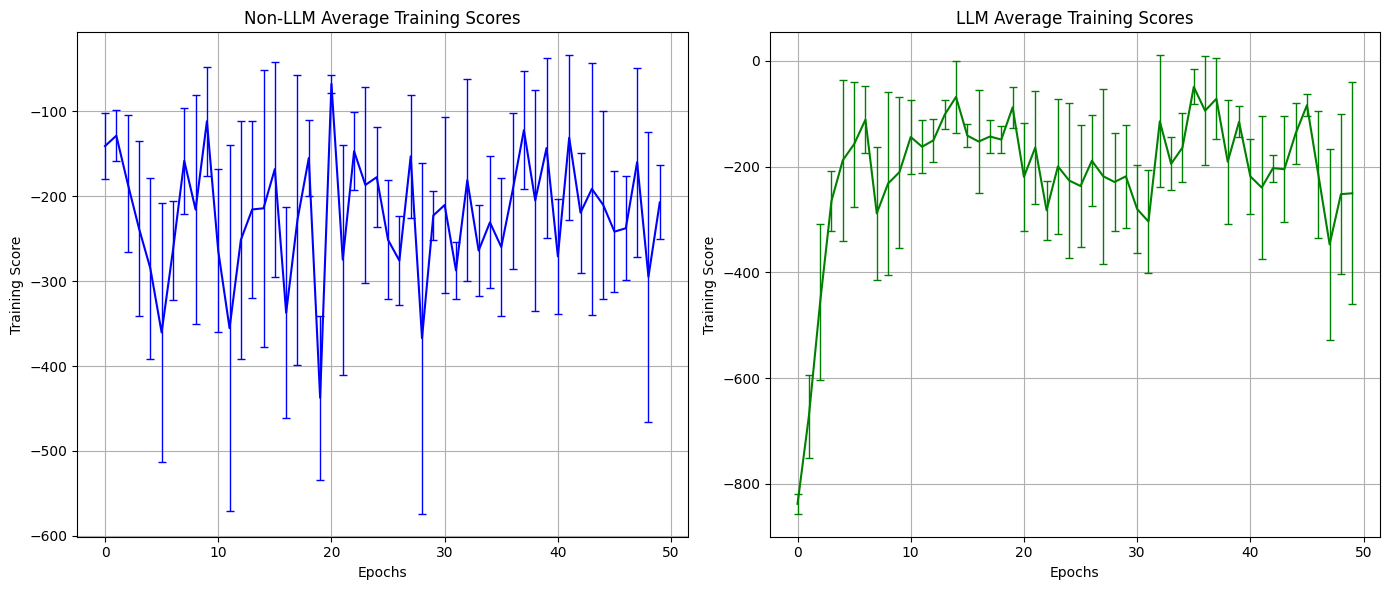

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))

# Plot for non-LLM training scores
ax1.errorbar(np.arange(len(nollm_training_scores_avg)), nollm_training_scores_avg, 
             yerr=nollm_training_scores_std, fmt='-', color='blue', label='Non-LLM', capsize=3, elinewidth= 1)
ax1.set_title("Non-LLM Average Training Scores")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Score")
ax1.grid(True)

# Plot for LLM training scores
ax2.errorbar(np.arange(len(training_scores_avg)), training_scores_avg, 
             yerr=training_scores_std, fmt='-', color='green', label='LLM', capsize=3, elinewidth= 1)
ax2.set_title("LLM Average Training Scores")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training Score")
ax2.grid(True)

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

### Testing Scores

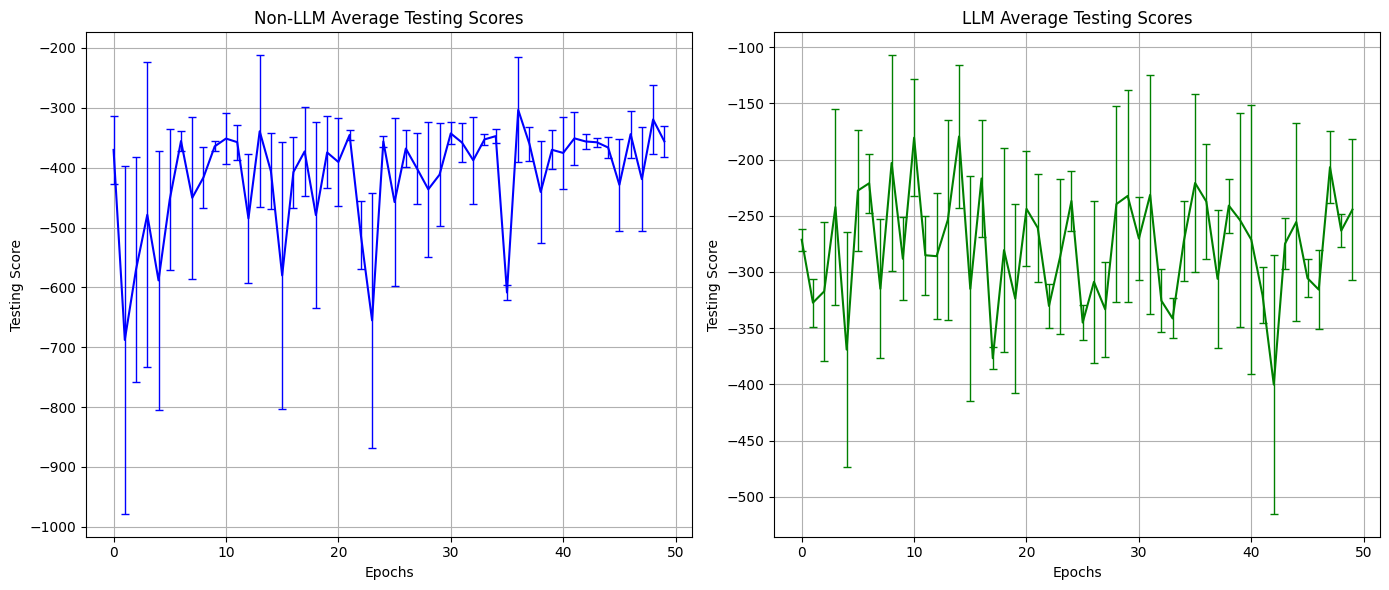

In [8]:
# Plot for testing scores

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for non-LLM testing scores
ax1.errorbar(np.arange(len(nollm_testing_scores_avg)), nollm_testing_scores_avg, 
             yerr=nollm_testing_scores_std, fmt='-', color='blue', label='Non-LLM', capsize=3, elinewidth= 1)
ax1.set_title("Non-LLM Average Testing Scores")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Testing Score")
ax1.grid(True)

# Plot for LLM testing scores
ax2.errorbar(np.arange(len(testing_scores_avg)), testing_scores_avg, 
             yerr=testing_scores_std, fmt='-', color='green', label='LLM', capsize=3, elinewidth= 1)
ax2.set_title("LLM Average Testing Scores")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Testing Score")
ax2.grid(True)

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()
